# 劃出英文文字雲

In [1]:
!pip install wordcloud               #下載文字雲軟體包。

In [2]:
from wordcloud import WordCloud, STOPWORDS   #下載文字雲及停用詞(a,the等)  

In [ ]:
#開啟欲進行萃取關鍵詞之文字檔
file=open('eng1.txt','r')
document1=file.read()
document1

In [4]:
# remove stopwords(移除停用詞: 使用WordCloud中之停用詞外，另再加入一個停用詞"said")
stopwords1 = set(STOPWORDS)
stopwords1.add("said")

In [5]:
#生成文字雲
wc = WordCloud(background_color="white",repeat=True,max_words=2000,stopwords=stopwords1)
wc.generate(document1)
wc.to_file("S1.png")  #將此文字雲儲存成檔案

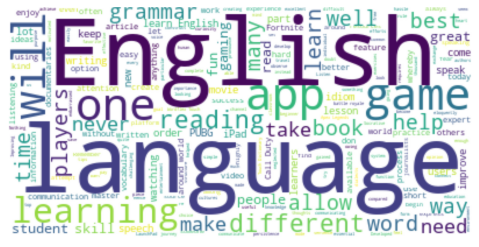

In [12]:
#將圖形畫在畫板中
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6), dpi=75)   #figsize(調整圖案寬和高)  dpi(參數指定繪圖對象的分辨率,即每英吋多少像素)) 
plt.imshow(wc, interpolation='gaussian')  #繪製圖片
plt.axis("off")   #是否顯示坐標尺
plt.show()

# 劃出自建圖案之英文文字雲

In [13]:
# create mask
import numpy as np
from PIL import Image 
sp_mask1 = np.array(Image.open('swallow.jpg'))

In [14]:
# generate word cloud
wc=WordCloud(background_color="white",repeat=True,max_words=2000, mask=sp_mask1)
wc.generate(document1)

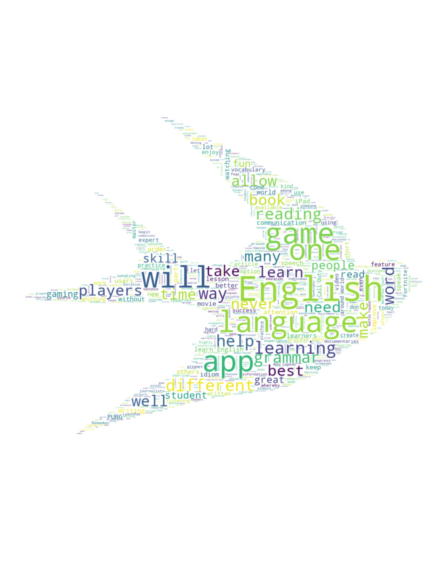

In [16]:
# plot the word cloud
plt.figure(figsize=(8,6), dpi=120)   #figsize(調整圖案寬和高)  dpi(參數指定繪圖對象的分辨率,即每英吋多少像素)) 
plt.imshow(wc, interpolation='gaussian')  #繪製圖片
plt.axis("off")   #是否顯示坐標尺
plt.show()

#提供文字及權重之辭典文件後，繪製文字雲
例如:採用TF-IDF之關鍵詞萃取(先將停用詞移除)後，再進行文字雲繪製

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidf2 = TfidfVectorizer(stop_words=stopwords1)
re1=tfidf2.fit_transform([document1])
word=tfidf2.get_feature_names()
print(re1)

 **方法:利用wordcloud.generate_from_frequencies(辭典檔案)**

In [18]:
#建立辭典檔案，包括[文字,權重]
name=[]
weight=[]
k=0
for ii in word:
    name.append(ii)
    weight.append(re1[0,k])
    k=k+1
dic1=dict(zip(name, weight)) #zip(names, weight) 會將 names 與 weight 的每個元素以一對一的方式配對起來

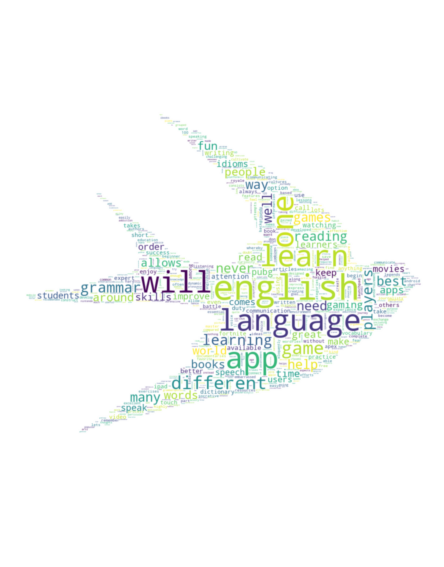

In [19]:
#生成文字雲
wc = WordCloud(background_color="white",repeat=True,max_words=2000, mask=sp_mask1)
wc.generate_from_frequencies(dic1)

plt.figure(figsize=(8,6), dpi=120) 
plt.imshow(wc, interpolation='gaussian')
plt.axis("off")
plt.show()
